In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [2]:
from numpy.random import normal

### Задача 1

##### 1.1

$$\mathcal{L} = \prod p(x_i|\theta) = \prod \frac{1}{\sigma\sqrt{2\pi}}\; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } = \frac{1}{\sigma^{n}(2\pi)^{n/2}}\; e^{ -\frac{\sum (x-\mu)^2}{2\sigma^2} } = \frac{1}{\sigma^{n}(2\pi)^{n/2}}\; e^{ -\frac{\sum x_i^{2} - 2\mu\sum x_i + n\mu^2}{2\sigma^2} }$$

In [3]:
observations = [0.88, 1.07, 1.27, 1.54, 1.91, 2.27, 3.84, 4.50, 4.64, 9.41]
n = len(observations)

In [4]:
print('сумма квадратов = ', np.square(observations).sum())
print('2 * cумма = ', 2 * np.sum(observations))

сумма квадратов =  159.7781
2 * cумма =  62.660000000000004


Тогда
$$ \mathcal{L}(\mu, \sigma^2) = \frac{1}{32\pi^{5}\sigma^{10}}\exp(-\frac{159.7781 - 62.660000000000004\mu + 10\mu^2}{2\sigma^2})$$

In [5]:
from scipy.stats import norm

mus = np.linspace(0, 7, 100)
sigmas = np.linspace(1, 7, 100)

mus, sigmas = np.meshgrid(mus, sigmas)

In [6]:
likelihoods = []

for mu, sigma in zip(mus.ravel(), sigmas.ravel()):
    likelihoods.append(norm.pdf(observations, loc=mu, scale=sigma).prod())

In [7]:
likelihoods = np.array(likelihoods).reshape(mus.shape)

Тут я нормализую likelihoods, чтобы получить значения из отрезка [0,1] и построить соответствующие доверительные интервалы [0.1, 0.5, 0.68, 0.9].

In [8]:
min_likelihoods = likelihoods.min()
max_likelihoods = likelihoods.max()
transformed_likelihoods = np.asarray((np.asarray(likelihoods) - min_likelihoods)) / (max_likelihoods - min_likelihoods)

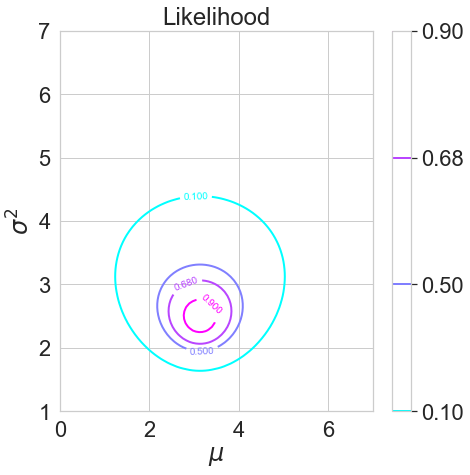

In [9]:
plt.figure(figsize=(7, 7))
contours = plt.contour(mus, 
                       sigmas, 
                       transformed_likelihoods,
                       [0.1, 0.5, 0.68, 0.9],
                       cmap='cool', linewidths = 2)
plt.clabel(contours, inline=True, fontsize=10)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('Likelihood')
plt.colorbar();

##### 1.2

$$\ln{\mathcal{L}(\mu_{fixed}, \sigma^2)} = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum(x_i - \mu)^2$$
$$\frac{\partial \ln{\mathcal{L}}}{\partial \sigma} = -\frac{n}{\sigma} - \frac{1}{\sigma^3}\sum(x_i - \mu)^2 = 0$$
$$\hat{\sigma_{\mu}}^2 = \frac{\sum(x_i - \mu)^2}{n}$$ -- оценка ОМП для $\sigma$ при фиксированном $\mu$

Подставим в функцию правдоподобия
$$\mathcal{L}(\mu, \hat{\sigma_{\mu}}^2) = \frac{1}{(2 \pi \hat{\sigma_{\mu}}^2)^{n/2}} \exp\left(-\frac{1}{2 \hat{\sigma_{\mu}}^2} \sum(x_i - \mu)^2\right) = \frac{1}{(2\pi)^{\frac{n}{2}} (\frac{\sum(x_i - \mu)^2}{n})^{n/2}}\exp\left(\frac{-\sum(x_i - \mu)^2}{2 \frac{\sum(x_i - \mu)^2}{n}}\right) = \frac{1}{(\frac{2\pi}{n} \sum(x_i - \mu)^2) ^{n / 2}}\exp(-\frac{n}{2})$$

Получаем профильное правдоподобие для $\mu$:
$$\mathcal{L}(\mu) = max_{\sigma^2}\mathcal{L}(\mu_{fixed}, \sigma^2) = \mathcal{L}(\mu, \hat{\sigma_{\mu}}^2) = e^{-\frac{n}{2}} \left(\frac{1}{\sqrt{2\pi}} \right)^n (\hat{\sigma_{\mu}}^2)^{-\frac{n}{2}} = e^{-\frac{n}{2}} \left(\frac{1}{\sqrt{2\pi}} \right)^n \left[\frac{\sum(x_i - \mu)^2}{n}\right]^{-\frac{n}{2}}$$

ХХЗХЗХЗХЗХЗЗ
Тогда профильное правдоподобие:
$$\hat{\sigma}^2 = argmax_{\sigma}\mathcal{L}(\mu_{fix}, \sigma^2) $$
$$\hat{\mu} = argmax_{\mu} \mathcal{L}(\mu, \hat{\sigma}^2) $$
Отсюда возьмем производную $\mathcal{L}(\mu, \hat{\sigma}^2)$ по $\mu$:
$$Const(-\frac{n}{2}(\sum(x_i - \mu)^2)^{-n/2 - 1} (-2\sum x_i + 2n\mu)) = 0$$
$$\frac{-\sum(x_i - \mu)}{(\sum(x_i - \mu)^2)^{n/2 + 1}} = 0$$
$$\hat{\mu} = \frac{\sum x_i}{n}$$

In [10]:
Lmu = []
log_Lmu = []
mus = np.linspace(-2, 8, 100)
for mu in mus:
    hat_sigma = np.square(observations - mu).mean()
    Lmu.append(norm.pdf(observations, loc=mu, scale=(hat_sigma ** 0.5)).prod())
    log_Lmu.append(norm.logpdf(observations, loc=mu, scale=(hat_sigma ** 0.5)).sum())

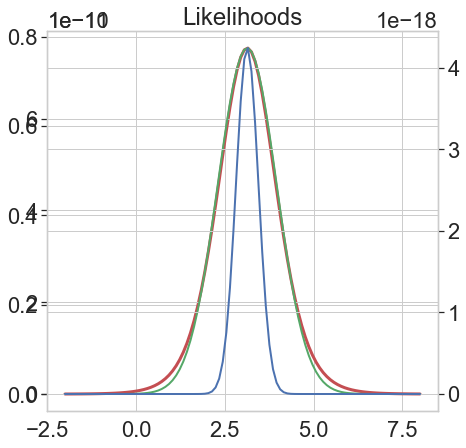

In [19]:
plt.figure(figsize=(7, 7))
plt.plot(mus, Lmu, color='r', linewidth=3)
plt.twinx()
plt.plot(mus, L_s2, color='g', linewidth=2)
plt.twinx()
plt.plot(mus, L_1, linewidth = 2)
plt.title('Likelihoods')
plt.show()

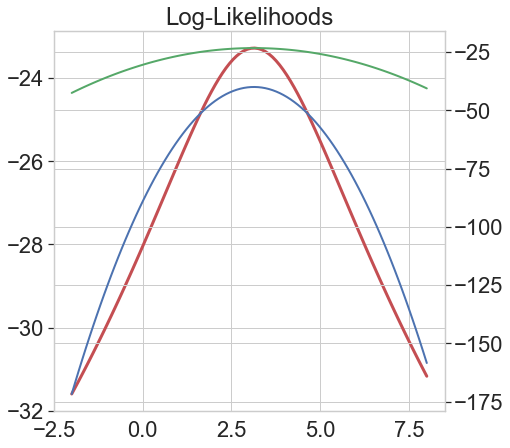

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(mus, log_Lmu, color='r', linewidth=3)
plt.twinx()
plt.plot(mus, log_L_s2, color='g', linewidth=2)
#plt.twinx()
plt.plot(mus, log_L_1, linewidth = 2)
plt.title('Log-Likelihoods')
plt.show()

##### 1.3

Оценочная функция правдоподобия:
$$\mathcal{L}(\mu, \sigma^ 2 = \hat{\sigma}^2) = \frac{1}{(2 \pi \hat{\sigma}^2)^{n/2}} \exp\left(-\frac{1}{2 \hat{\sigma}^2} \sum(x_i - \mu)^2\right)$$

Выборочная оценка дисперсии:
$$s^2 = \frac{1}{n-1}\sum(x_i - \bar{x})^2$$

In [13]:
def get_s2(X):
    return (np.square(X - np.mean(X)).sum()) / (n - 1)

In [14]:
s2 = get_s2(observations)

In [15]:
L_s2 = []
L_1 = []
log_L_s2 = []
log_L_1 = []
for mu in mus:
    L_s2.append(norm.pdf(observations, loc=mu, scale=(s2 ** 0.5)).prod())
    L_1.append(norm.pdf(observations, loc=mu, scale=1).prod())
    log_L_s2.append(norm.logpdf(observations, loc=mu, scale=(s2 ** 0.5)).sum())
    log_L_1.append(norm.logpdf(observations, loc=mu, scale=1).sum())

In [16]:
from scipy.stats import chi2
cut_level = -chi2.ppf(q=0.68, df=1) / 2

In [17]:
mu_estimation = np.mean(observations)

In [18]:
mus = np.linspace(-2, 8, 100)

ДИ для 1 функции

In [21]:
sigma = np.square(observations - mu_estimation).mean()
max_log_likelihood1 = norm.logpdf(observations, loc=mu_estimation, scale=(sigma ** 0.5)).sum()

In [22]:
likelihoods1 = []
for mu in mus:
    sigma = np.square(observations - mu).mean()
    likelihoods1.append(norm.logpdf(observations, loc=mu, scale=(sigma ** 0.5)).sum())

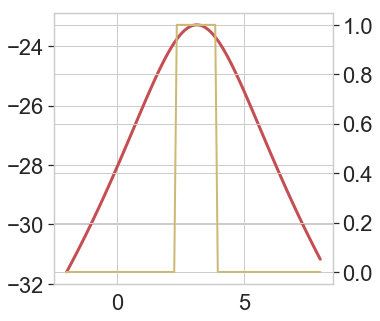

In [23]:
plt.figure(figsize=(5, 5))
plt.plot(mus, log_Lmu, color='r', linewidth=3)
plt.twinx()
plt.plot(mus, (np.array((likelihoods1)) - max_log_likelihood1 > cut_level), color='y', linewidth=2)


ДИ для 2 функции

In [24]:
sigma = np.square(observations - np.mean(observations)).mean()
max_log_likelihood2 = norm.logpdf(observations, loc=mu_estimation, scale=(sigma ** 0.5)).sum()

In [25]:
likelihoods2 = []
for mu in mus:
    likelihoods2.append(norm.logpdf(observations, loc=mu, scale=(sigma ** 0.5)).sum())

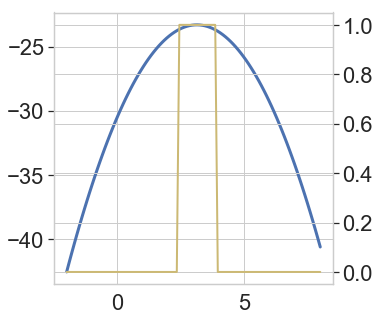

In [26]:
plt.figure(figsize=(5, 5))
plt.plot(mus, log_L_s2, linewidth=3)
plt.twinx()
plt.plot(mus, (np.array((likelihoods2)) - max_log_likelihood2 > cut_level), color='y', linewidth=2)

ДИ для 3 функции

In [27]:
max_log_likelihood3 = norm.logpdf(observations, loc=mu_estimation, scale=1).sum()

In [28]:
likelihoods3 = []
for mu in mus:
    likelihoods3.append(norm.logpdf(observations, loc=mu, scale=1).sum())

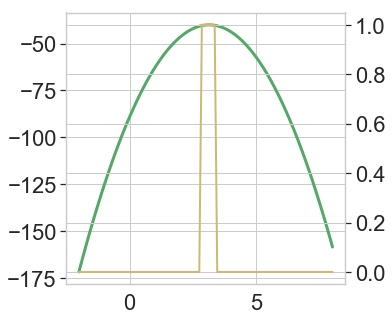

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(mus, log_L_1, color='g', linewidth=3)
plt.twinx()
plt.plot(mus, (np.array((likelihoods3)) - max_log_likelihood3 > cut_level), color='y', linewidth=2)

In [30]:
ns = np.array([0, 0, 0])
for j in range(100):
        X = normal(loc=3, scale=(6**0.5), size=10)
        fit_mu, fit_sigma = norm.fit(X)
        likelihood = norm.logpdf(X, loc=fit_mu, scale=fit_sigma).sum()
        
        if (likelihood - max_log_likelihood1 > cut_level):
            ns[0] += 1
        if (likelihood - max_log_likelihood2 > cut_level):
            ns[1] += 1
        if (likelihood - max_log_likelihood3 > cut_level):
            ns[2] += 1

In [31]:
ns / 100

array([0.77, 0.77, 1.  ])

##### 1.4

Профильное правдоподобие для $\sigma^2$:
$$\mathcal{L}(\sigma^2) = max_{\mu}\mathcal{L}(\mu, \sigma^2_{fixed}) = \mathcal{L}(\hat{\mu_{\sigma^2}}, \sigma^2) = \left( \frac{1}{\sqrt{2\pi}} \right)^n (\sigma^2)^{-n/2} exp \left[ -\frac{1}{2\sigma^2} \sum(x_i - \bar{x})^2 \right]$$
С выборочной дисперсией:
$$\frac{(n-1)s^2}{\sigma^2} \sim \chi_{n-1}^{2}$$
Заметим, что
$$\mathcal{L}(\sigma^2) = \left( \frac{1}{\sqrt{2\pi}} \right)^n (\sigma^2)^{-n/2} exp \left[ - \frac{(n-1)s^2}{2\sigma^2} \right]$$
При этом плотность хи-квадрат имеет вид:
$$f_{\chi^2(k)}(x) = \frac{(1/2)^{k \over 2}}{\Gamma\!\left({k \over 2}\right)}\, x^{{k \over 2} - 1}\, e^{-\frac{x}{2}}$$
Тогда
$$\mathcal{L}(\sigma^2) = Const \cdot f_{\chi^2(k)}\left(\frac{(n-1)s^2}{\sigma^2}\right) \left[\frac{(n-1)s^2}{\sigma^2}\right]^{3/2} * ((n-1)s^2)^{-n/2}$$

In [32]:
L_chis = []
L_sigmas = []
sigmas = np.linspace(1, 50, 100)
for sigma in sigmas:
    s2 = get_s2(observations)
    tmp = (n-1)*s2
    chi = tmp / (sigma)
    L_chis.append((chi2.pdf(chi, df=10) * (chi ** (3/2)) * (tmp ** (-n/2))).prod())
    L_sigmas.append(norm.pdf(observations, loc=np.mean(observations), scale=(sigma ** 0.5)).prod())

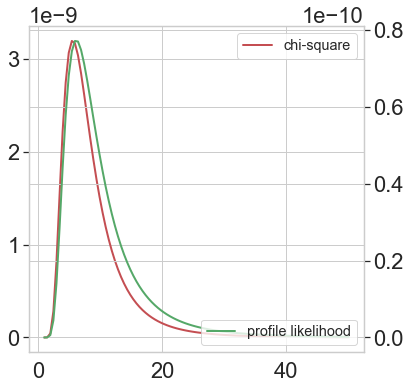

In [33]:
plt.figure(figsize=(6, 6))
plt.plot(sigmas, L_chis, color='r', linewidth=2, label="chi-square")
plt.legend(loc='upper right', fontsize='x-large')
plt.twinx()
plt.plot(sigmas, L_sigmas, color='g', linewidth=2, label='profile likelihood')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

## Задача 2

Воспользуемся Дельта-Методом.
$$T = (R, \Theta)$$
Пусть вектор средних $$\mu = (\mu_1, \mu_2)$$
Тогда
$$VarY \simeq \sigma_{R}^2[\frac{\partial g(\mu)}{\partial \mu_1}]^2 + \sigma_{\Theta}^2[\frac{\partial g(\mu)}{\partial \mu_2}]^2 + cov(R, \Theta)[\frac{\partial g(\mu)}{\partial \mu_1}][\frac{\partial g(\mu)}{\partial \mu_2}] = \sigma_{R}^2 sin^2{\mu_2} + \sigma_{\Theta}^2\mu_{1}^2 cos^2{\mu_2} + cov(R, \Theta)\mu_{1}sin{\mu_2}cos{\mu_2}$$

Если R фиксирована, то для $Y = Rsin\Theta$ есть только одна случайная величина, а значит $T = (\Theta)$
$$VarY \simeq \sigma_{\Theta}^2[\frac{\partial g(\mu)}{\partial \mu_2}]^2 = \sigma_{\Theta}^2\mu_{1}^2 cos^2{\mu_2}$$
Эта величина будет принимать максимальное значение при $cos^2{\mu_2} = 1$, то есть $\mu_2 = k\pi$, $k \in N$

## Задача 3

##### 3.1

$$X \sim \mathcal{N}(\mu, 1)$$
$$(X - \mu) \to \mathcal{N}(0, 1)$$
$$(g(X) - g(\mu)) \to \mathcal{N}(0, [g'(\mu)]^2 )$$
$$[g'(\mu)]^2 = \left(\frac{e^{\mu}}{(1 + e^{\mu})^2}\right)^2$$
$$g(X) \to \mathcal{N}(\frac{e^{\mu}}{1 + e^{\mu}}, \left[\frac{e^{\mu}}{(1 + e^{\mu})^2}\right]^2)$$

In [80]:
def g(x):
    return np.exp(x) / (1 + np.exp(x))
def getV(x):
    return (np.exp(x) / (1 + np.exp(x)) ** 2) ** 2

In [81]:
mus = np.linspace(-10, 10, 1000)
E_vals = []
Vars = []
for mu in mus:
    E_vals.append(g(mu))
    Vars.append(getV(mu))

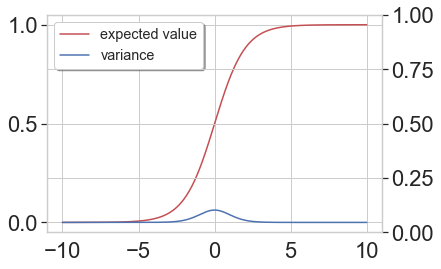

In [82]:
fig, ax = plt.subplots()
ax.plot(mus, E_vals, color='r', label="expected value")
ax.twinx()
ax.plot(mus, Vars, label = "variance")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

##### 3.2

In [83]:
mus = np.linspace(-10, 10, 1000)

In [84]:
fitted_mus = []
fitted_sigmas = []
for mu in mus:
    X = normal(loc=mu, size=1000)
    fit_mu, fit_sigma = norm.fit(g(X))
    fitted_mus.append(fit_mu)
    fitted_sigmas.append(fit_sigma)

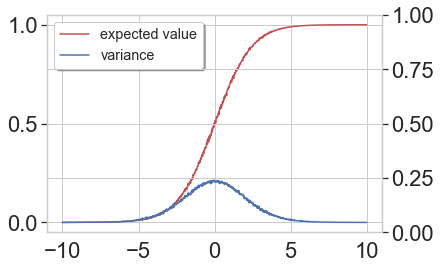

In [85]:
fig, ax = plt.subplots()
ax.plot(mus, fitted_mus, color='r', label="expected value")
ax.twinx()
ax.plot(mus, fitted_sigmas, label = "variance")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

In [86]:
def g2(x):
    return (np.exp(x) * (1 - np.exp(x))) / (1 + np.exp(x)) ** 3

In [87]:
g2x = []
for mu in mus:
    g2x.append(g2(mu))

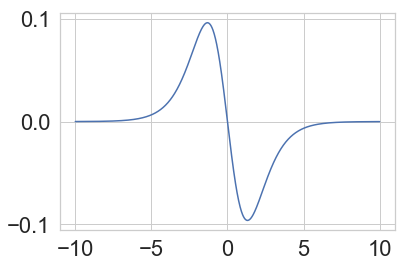

In [88]:
plt.plot(mus, g2x)
plt.show()

##### 3.3

$$X \sim \mathcal{N}(1, \sigma ^ 2)$$
$$(X - 1) \to \mathcal{N}(0, \sigma ^ 2)$$
$$(g(X) - g(1)) \to \mathcal{N}(0, \sigma ^ 2[g'(1)]^2 )$$
$$[g'(1)]^2 = (\frac{e}{(1 + e)^2})^2$$
$$g(X) \to \mathcal{N}(\frac{e}{1 + e}, \sigma ^ 2[\frac{e}{(1 + e)^2}]^2)$$

In [89]:
sigmas = np.linspace(0, 10, 1000) #sigma^2
Es = []
Vs = []
for sigma in sigmas:
    Es.append(g(1))
    Vs.append(sigma * getV(1))

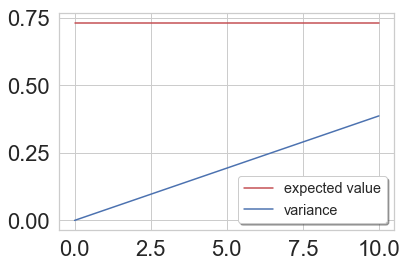

In [94]:
fig, ax = plt.subplots()
ax.plot(sigmas, Es, color='r', label="expected value")
#ax.twinx()
ax.plot(sigmas, Vs, label = "variance")
ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

In [101]:
fitted_mus2 = []
fitted_sigmas2 = []
for sigma in sigmas:
    X = normal(loc=1, scale=(sigma ** 0.5), size=1000)
    fit_mu, fit_sigma = norm.fit(g(X))
    fitted_mus2.append(fit_mu)
    fitted_sigmas2.append(fit_sigma)

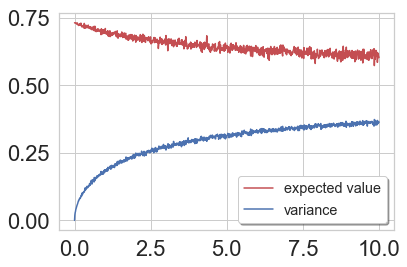

In [104]:
fig, ax = plt.subplots()
ax.plot(sigmas, fitted_mus2, color='r', label="expected value")
#ax.twinx()
ax.plot(sigmas, fitted_sigmas2, label = "variance")
ax.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show()

## Задача 4

##### 4.1

In [110]:
from scipy.stats import gamma

In [111]:
n = 7
m = 6
A_e = [[0] * m for i in range(n)]
A_var = [[0] * m for i in range(n)]
B_e = [[0] * m for i in range(n)]
B_var = [[0] * m for i in range(n)]
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
betas = [i for i in range(2, 8)]

In [112]:
def pull(x, x_true, err):
    return (np.asarray(x) - x_true) / err

In [113]:
for i in range(0, 7):
    for j in range(0, 6):
        
        fitted_alphas = []
        fitted_betas = []

        for k in range(300):
            X = gamma.rvs(scale=1 / betas[j], a=alphas[i], size=100)
            fit_alpha, _, fit_beta = gamma.fit(X, floc=0)
            fitted_betas.append(1 / fit_beta)
            fitted_alphas.append(fit_alpha)
            
        alpha_q16, alpha_q84 = np.percentile(fitted_alphas, [16, 84])
        err_alpha = (alpha_q84 - alpha_q16) / 2
        pull_alpha = pull(fitted_alphas, alphas[i], err_alpha)
        A_e[i][j] = np.mean(pull_alpha)
        A_var[i][j] = 1 / (len(pull_alpha) - 1) * (np.square(pull_alpha - A_e[i][j]).sum())

        
        beta_q16, beta_q84 = np.percentile(fitted_betas, [16, 84])
        err_beta = (beta_q84 - beta_q16) / 2
        pull_beta = pull(fitted_betas, betas[j], err_beta)
        B_e[i][j] = np.mean(pull_beta)
        B_var[i][j] = 1 / (len(pull_beta) - 1) * (np.square(pull_beta - B_e[i][j]).sum())

In [114]:
g, h = np.meshgrid(betas, alphas)

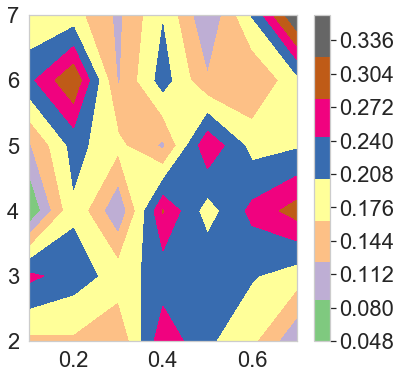

In [115]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, A_e, 100, cmap='Accent')
plt.colorbar();

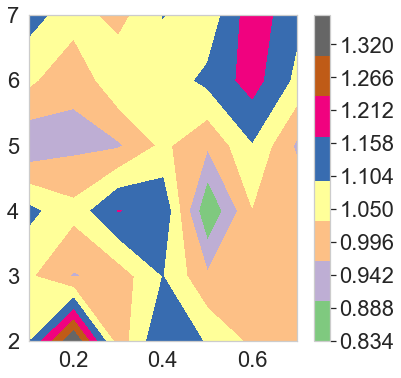

In [116]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, A_var, 100, cmap='Accent')
plt.colorbar();

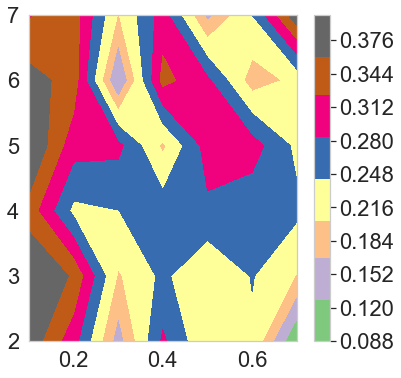

In [117]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, B_e, 100, cmap='Accent')
plt.colorbar();

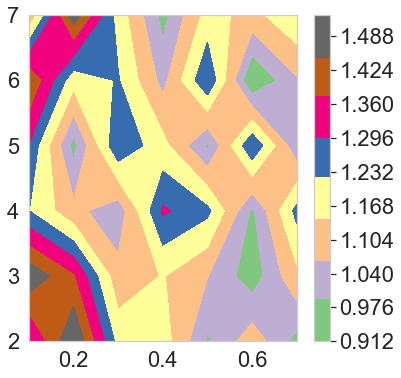

In [118]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, B_var, 100, cmap='Accent')
plt.colorbar();

In [119]:
n = 7
m = 6
A2_e = [[0] * m for i in range(n)]
A2_var = [[0] * m for i in range(n)]
B2_e = [[0] * m for i in range(n)]
B2_var = [[0] * m for i in range(n)]
alphas2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
betas2 = [i for i in range(2, 8)]

##### 4.2

$$\mathcal{L}_{MAP} = Const \cdot \mathcal{L}_{MLE} \cdot f(\theta)$$
В нашем случае $f(\alpha) \sim U[0.1; 0.7]$ и $f(\beta) \sim U[2; 7]$
Тогда 
$$\mathcal{\ln L}_{MAP} = \sum\limits_i \left(  \alpha \log \beta - \log \Gamma(\alpha) - \beta x_i + (\alpha - 1) \log x_i \right) f_{\alpha, \beta}$$
Для $\beta$:

$$\mathcal{\ln L_{MAP}}'_\beta = \frac{1}{5} \sum\limits_{i} \frac{\alpha}{\beta} - x_i = 0$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}, \beta \in [2; 7]$$
Значит $$2 \leq \frac{\alpha N}{\sum\limits_i x_i} \leq 7$$
$$2\bar{X} \leq \alpha \leq 7\bar{X}, \alpha \in [0.1; 0.7]$$

Таким образом, получается, что мы можем найти fit_alpha, fit_beta с помощью MLE через обычный gamma.fit.

А потом для fit_beta проверить, что $2\bar{X} \leq$ fit_alpha $\leq 7\bar{X}$ и fit_alpha $\in [0.1; 0.7]$

In [120]:
def check_alpha(X, a):
    return a >= 2 * np.mean(X) and a <= 7 * np.mean(X) and a >= 0.1 and a <= 0.7

In [129]:
for i in range(0, 7):
    for j in range(0, 6):
        
        fitted_alphas = []
        fitted_betas = []

        for k in range(400):
            while(True):
                X = gamma.rvs(scale=1 / betas[j], a=alphas[i], size=100)
                fit_alpha, _, fit_beta = gamma.fit(X, floc=0)
                
                if check_alpha(X, fit_alpha):
                    fitted_betas.append(1 / fit_beta)
                    fitted_alphas.append(fit_alpha)
                    break
            
        alpha_q16, alpha_q84 = np.percentile(fitted_alphas, [16, 84])
        err_alpha = (alpha_q84 - alpha_q16) / 2
        pull_alpha = pull(fitted_alphas, alphas[i], err_alpha)
        A2_e[i][j] = np.mean(pull_alpha)
        A2_var[i][j] = 1 / (len(pull_alpha) - 1) * (np.square(pull_alpha - A_e[i][j]).sum())

        
        beta_q16, beta_q84 = np.percentile(fitted_betas, [16, 84])
        err_beta = (beta_q84 - beta_q16) / 2
        pull_beta = pull(fitted_betas, betas[j], err_beta)
        B2_e[i][j] = np.mean(pull_beta)
        B2_var[i][j] = 1 / (len(pull_beta) - 1) * (np.square(pull_beta - B_e[i][j]).sum())

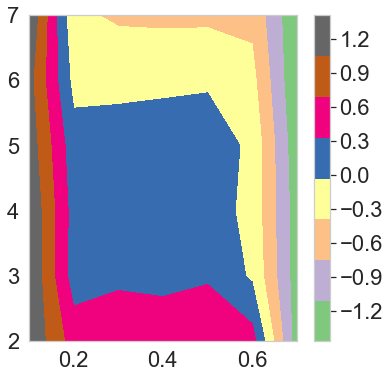

In [130]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, A2_e, 100, cmap='Accent')
plt.colorbar();

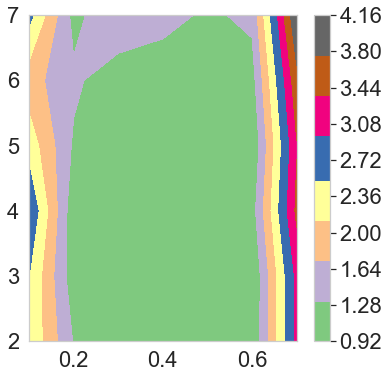

In [131]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, A2_var, 100, cmap='Accent')
plt.colorbar();

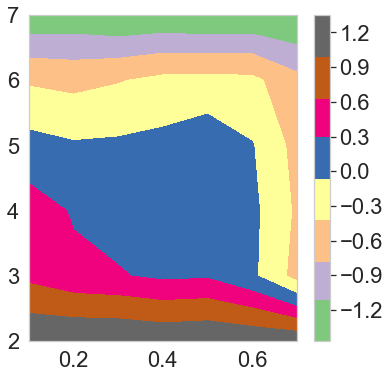

In [132]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, B2_e, 100, cmap='Accent')
plt.colorbar();

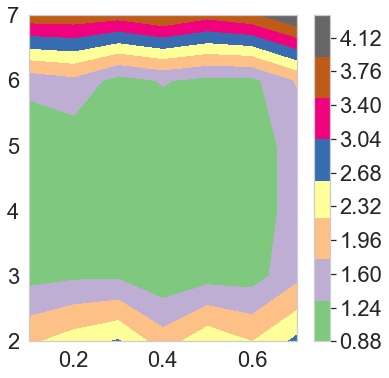

In [133]:
plt.figure(figsize=(6, 6))
contours = plt.contourf(h, g, B2_var, 100, cmap='Accent')
plt.colorbar();